In [95]:
import pandas as pd


Importing Data

In [96]:
data=pd.read_csv('netflix.csv')

Non- Graphical Analysis of Data

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


From the results we can conclude that Director has maximum Null Columns

In [98]:
data.isnull().sum()/len(data.index)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [99]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [100]:
data.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [101]:
data.shape

(8807, 12)

#number of non-null data in each column

In [102]:
data.nunique()      

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [103]:
#no of films in each year
data["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

**Visual Analysis Of Data**

Change in Number of Content by Year

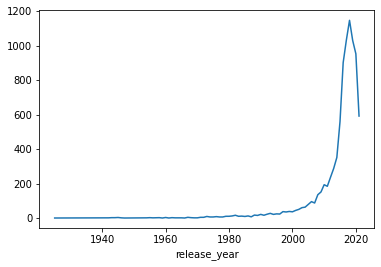

In [104]:
import matplotlib.pyplot as plt
import numpy as np
data[['release_year']] = data[['release_year']].apply(pd.to_numeric)
temp=data.groupby("release_year")["show_id"].count()
temp.reset_index()
temp.plot(x="release_year", y=["show_id"], kind="line")


The Graph above clearly shows that Number of contents released was very low bofore 2000. After that it is Increasing abruptly. we Can also See sharp downfall in recent years

#Comparision of no of films vs webseries with Years

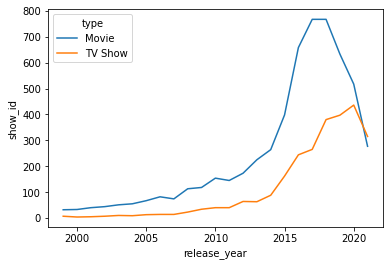

In [105]:
import seaborn as sns
data[['release_year']] = data[['release_year']].apply(pd.to_numeric)
temp=data.groupby(["release_year","type"])["show_id"].count()
temp=temp.to_frame().reset_index()
temp=temp[temp.release_year>1998]
sns.lineplot( x = "release_year",
             y = "show_id",
             hue = "type",
             data = temp)

Graph shows that Tv Shows has surpassed Films in recent years

**Distribution of content among countries**

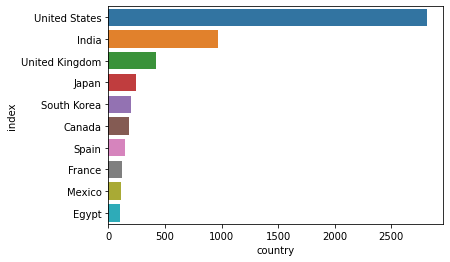

In [106]:
top_countries=data['country'].value_counts().reset_index()  
top_countries=top_countries[:10]
top_countries
sns.barplot( y="index",x="country",data=top_countries)

USA dominates the market here. There is too much disparity in choices for users in different countries

([<matplotlib.patches.Wedge at 0x7f6bf6e11410>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')])

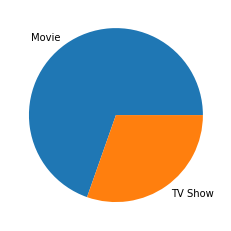

In [107]:
temp=data.groupby("type")["show_id"].count()
temp.reset_index()
plt.pie(temp,labels=["Movie","TV Show"])

**#Data prepartion  [Column splitting]**

In [ ]:
                        #didn't worked as we had float in our data
#df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
#df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [108]:
data['seasons']=data['duration']
def conversion(duration):
  duration=str(duration)
  if "min" in duration:
    return duration.split()[0]
  else:
    return 0


def conversion_season(seasons):
  seasons=str(seasons)
  if "Season" in seasons:
    return seasons.split()[0]
  else:
    return 0

In [109]:
data['duration'] = data['duration'].apply(conversion)
data['seasons'] = data['seasons'].apply(conversion_season)

In [110]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


**UNIVARIATE ANALYSIS**

#Distribution of Duration of Shows

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


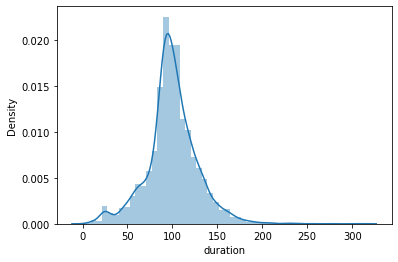

In [111]:
temp=data.loc[data['duration'] != 0]
sns.distplot(temp['duration'])

It approximately follows Normal Distribution with Mean around 100 mins

**COUNT PLOT**

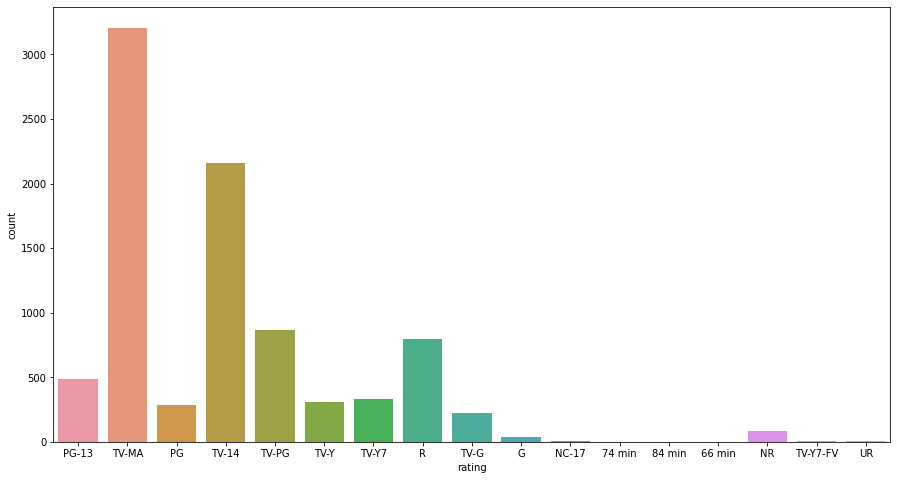

In [112]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
ax=sns.countplot(x="rating", data=data)
plt.show(ax)

**BIVARIATE ANALYSIS**

Scatter plot

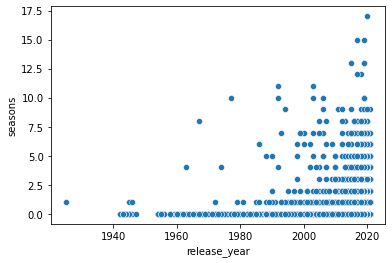

In [113]:
data['duration']=pd.to_numeric(data['duration'])
#data.info()
data['seasons']=pd.to_numeric(data['seasons'])
sns.scatterplot(data=data,x='release_year',y='seasons')


In the past very few content used to have more no of seasons. In the recent years more content are having more than one season. Also no of season has went upto 17. 

#**Boxplot**

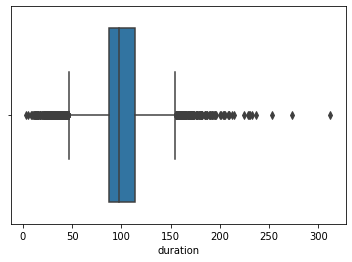

In [114]:
temp=data.loc[data['duration'] != 0]
sns.boxplot(x=temp['duration'])

This data has a lot of outliers. Median durations is around 100 with most of the data spread between 50 & 150 mins

# Correlation among columns

In [115]:
data.corr()

,release_year,duration,seasons
release_year,1.000000,-0.247959,0.100102
duration,-0.247959,1.000000,-0.605134
seasons,0.100102,-0.605134,1.000000


None of the columns are highly Correlated. release year and duration are negatively correlated while release year and seasons are positively correlated

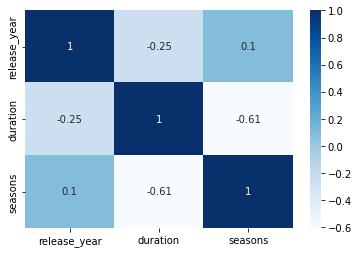

In [116]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

#Handling Null Values

In [118]:
data['rating']=data['rating'].fillna(data['rating'].mode().iloc[0])
data['country']=data['country'].fillna('Not Available')

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   int64 
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  seasons       8807 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 894.6+ KB


#Outlier Treatment

Inter-quartile range Method of removing outliers

In [120]:
def detect_outliers_iqr(column):
    outliers=[]
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    outliers_removed=[]
    for x in column:
      if x > lwr_bound and x < upr_bound:
        outliers_removed.append(x)
      else:
        outliers_removed.append(None)
    return outliers_removed

In [121]:
sample_outliers = detect_outliers_iqr(data['duration'])
data['duration']= sample_outliers

    

-159.0 265.0


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       8807 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8807 non-null   object 
 9   duration      8805 non-null   float64
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
 12  seasons       8807 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 894.6+ KB
